# USD-MNT Prophet Forecasting

Import libraries and load dataset from CSV file. It is assumed that the Prophet package is already installed and ready to use.

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('C:\\Users\\rober\\.matplotlib\\mpl_configdir\\stylelib\\mds.mplstyle')

In [2]:
mnt = pd.read_csv('Data/USD-MNT.csv')

In [3]:
mnt.head()

,Date,USD
0,1/2/2008,1169.97
1,1/3/2008,1169.97
2,1/4/2008,1169.97
3,1/7/2008,1169.81
4,1/8/2008,1170.11


In [128]:
mnt.tail()

,ds,y
3567,2018-09-28,2552.13
3568,2018-09-29,2552.13
3569,2018-09-30,2552.13
3570,2018-10-01,2550.04
3571,2018-10-02,2564.40


Prophet requires that the date/time column be formatted as a datetime object in the dataframe. In addition, the date column should be called "ds" and the value columns should be called "y".

In [4]:
mnt['Date'] = pd.to_datetime(mnt['Date'])

In [5]:
mnt = mnt.rename(columns={"Date": "ds", "USD": "y"})

In [6]:
mnt.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Plot the time series first, before we go into prophet. 

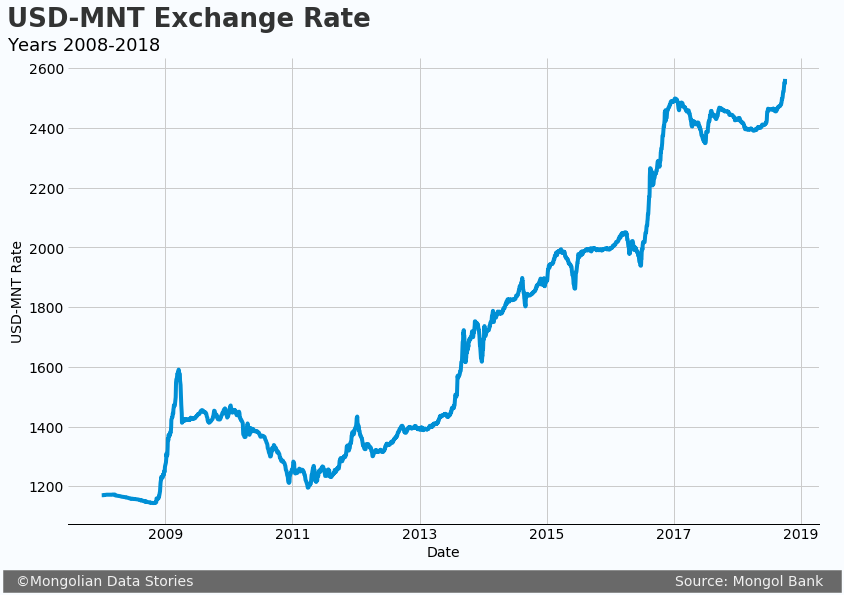

In [7]:
fig, ax = plt.subplots()
ax.plot(mnt['ds'], mnt['y'])
ax.set_xlabel('Date')
ax.set_ylabel('USD-MNT Rate')
ax.text(x = 732500, y = 2740, s = 'USD-MNT Exchange Rate', fontsize=26, weight='bold', alpha=.8)
ax.text(x = 732500, y = 2660, s= 'Years 2008-2018', fontsize=18)
ax.text(x = 732500, y = 870, s = '  ©Mongolian Data Stories                                                                                                           Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/USD-MNT Timeseries.png', dpi = 300, bbox_inches="tight")

Fit a Prophet model to our dataset. 

In [8]:
m = Prophet(yearly_seasonality=15, interval_width=0.90, changepoint_prior_scale=20)
m.fit(mnt)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Make a future dataframe 365 days to the future. Predictions will be added to this dataframe.

In [9]:
future = m.make_future_dataframe(periods=180)
future.tail()

,ds
3747,2019-03-27
3748,2019-03-28
3749,2019-03-29
3750,2019-03-30
3751,2019-03-31


Predict into the future to fill the future dataframe. Included are the upper and lower confidence intervals.

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3747,2019-03-27,2476.234250,2217.358226,2749.293347
3748,2019-03-28,2474.966789,2213.728553,2756.581058
3749,2019-03-29,2472.996000,2206.147273,2753.137936
3750,2019-03-30,2470.932349,2202.975824,2760.196868
3751,2019-03-31,2468.645244,2202.915207,2760.875864


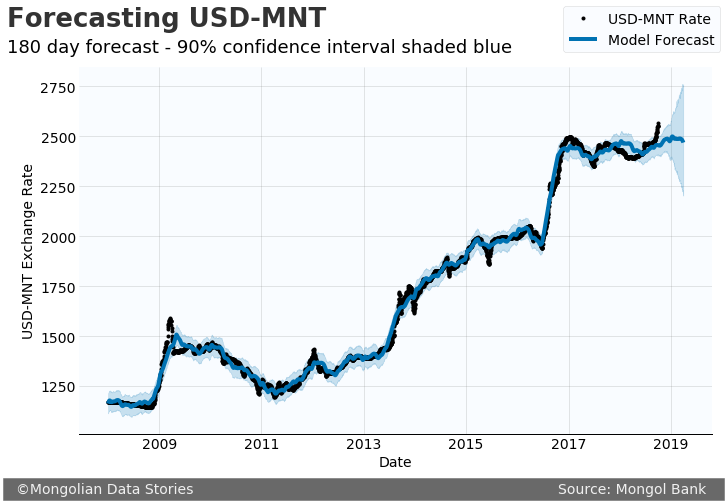

In [11]:
fig1 = m.plot(forecast, xlabel="Date", ylabel="USD-MNT Exchange Rate")
fig1.text(x = 0, y = 1.06, s = 'Forecasting USD-MNT ', fontsize=26, weight='bold', alpha=.8)
fig1.text(x = 0, y = 1.00, s= '180 day forecast - 90% confidence interval shaded blue', fontsize=18)
fig1.text(x = 0, y = -0.02, s = '  ©Mongolian Data Stories                                                                                 Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
fig1.legend(labels=('USD-MNT Rate', "Model Forecast"))
plt.savefig('Output/USD Forecast.png', dpi = 300, bbox_inches="tight")

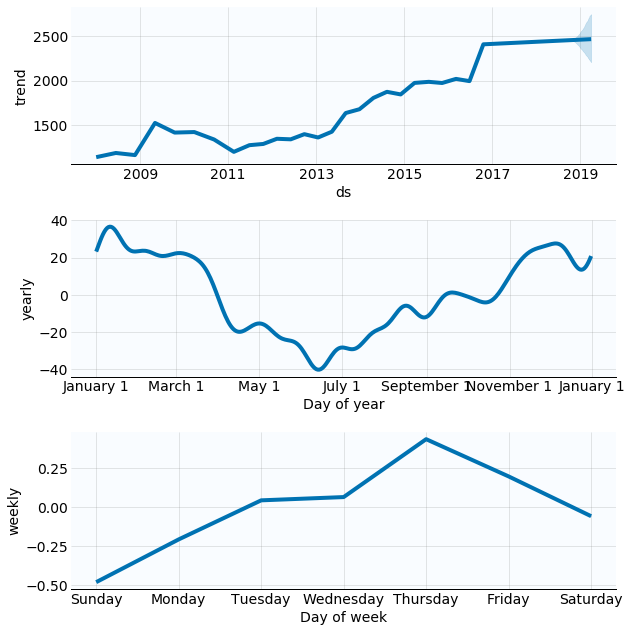

In [12]:
fig2 = m.plot_components(forecast)

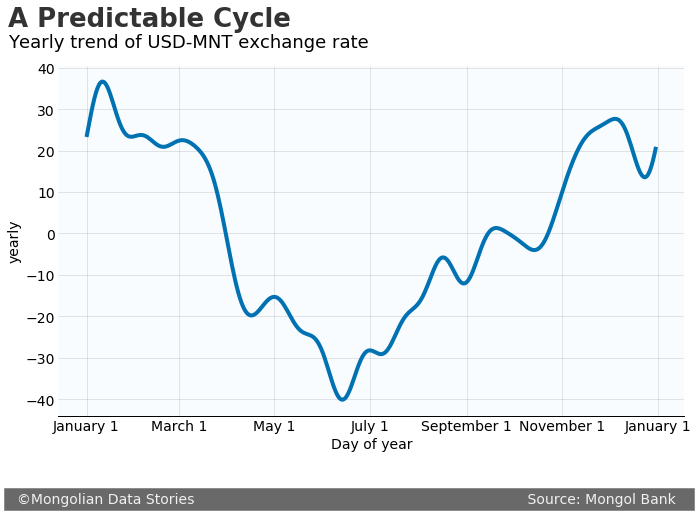

In [13]:
import matplotlib.pyplot as plt
from fbprophet.plot import plot_yearly
fig4 = plot_yearly(m)
plt.text(x = 736280, y = 50, s = 'A Predictable Cycle', fontsize=26, weight='bold', alpha=.8)
plt.text(x = 736280, y = 45, s= 'Yearly trend of USD-MNT exchange rate', fontsize=18)
plt.text(x = 736280, y = -65, s = '  ©Mongolian Data Stories                                                                          Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/USD Yearly Trend.png', dpi = 300, bbox_inches="tight")

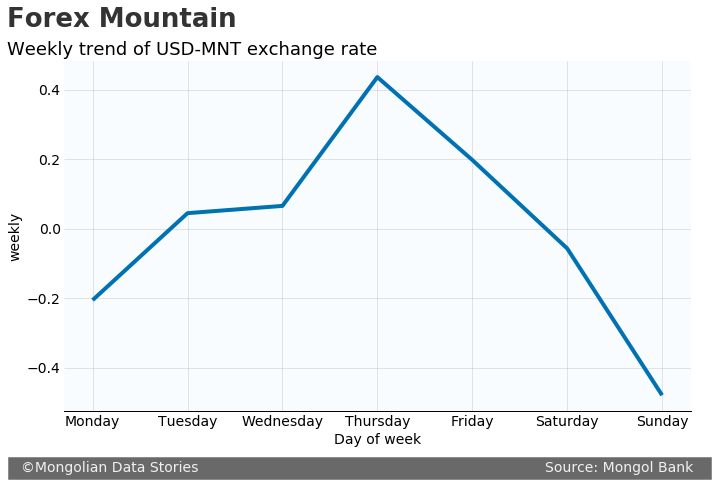

In [14]:
from fbprophet.plot import plot_weekly
b = plot_weekly(m, weekly_start=1)
plt.text(x = -.9, y = .58, s = 'Forex Mountain', fontsize=26, weight='bold', alpha=.8)
plt.text(x = -.9, y = .5, s= 'Weekly trend of USD-MNT exchange rate', fontsize=18)
plt.text(x = -.85, y = -.7, s = '  ©Mongolian Data Stories                                                                             Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/USD Weekly Trend.png', dpi = 300, bbox_inches="tight")

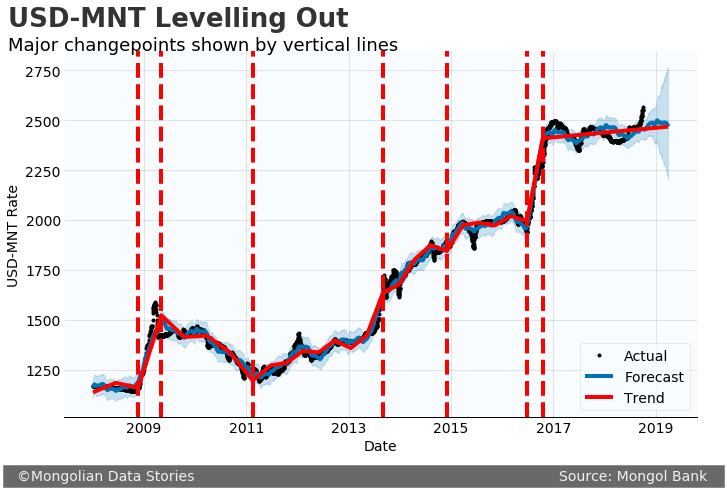

In [15]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast, xlabel='Date', ylabel='USD-MNT Rate')
c = add_changepoints_to_plot(fig.gca(), m, forecast, threshold=2)
plt.text(x = '2006-05-02T00:00:00.000000000', y = 2970, s = 'USD-MNT Levelling Out', fontsize=26, weight='bold', alpha=.8)
plt.text(x = '2006-05-02T00:00:00.000000000', y = 2850, s= 'Major changepoints shown by vertical lines', fontsize=18)
plt.text(x = '2006-05-02T00:00:00.000000000', y = 700, s = '  ©Mongolian Data Stories                                                                                 Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.legend(labels=('Actual', 'Forecast', 'Trend'))
plt.savefig('Output/USD Changepoints.png', dpi = 300, bbox_inches="tight")

In [16]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2008-01-02,1138.066087,1138.066087,1138.066087,1112.477552,1211.146803,23.838443,23.838443,23.838443,0.0,0.0,0.0,0.065167,0.065167,0.065167,23.773276,23.773276,23.773276,1161.904530
1,2008-01-03,1138.360478,1138.360478,1138.360478,1116.009113,1215.726632,26.198721,26.198721,26.198721,0.0,0.0,0.0,0.435834,0.435834,0.435834,25.762887,25.762887,25.762887,1164.559199
2,2008-01-04,1138.654869,1138.654869,1138.654869,1116.494162,1217.879453,27.930302,27.930302,27.930302,0.0,0.0,0.0,0.197453,0.197453,0.197453,27.732849,27.732849,27.732849,1166.585171
3,2008-01-07,1139.538042,1139.538042,1139.538042,1125.511154,1221.089865,32.725635,32.725635,32.725635,0.0,0.0,0.0,-0.205936,-0.205936,-0.205936,32.931571,32.931571,32.931571,1172.263677
4,2008-01-08,1139.832433,1139.832433,1139.832433,1124.779646,1223.739605,34.299272,34.299272,34.299272,0.0,0.0,0.0,0.044252,0.044252,0.044252,34.255020,34.255020,34.255020,1174.131705


from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='3285 days', horizon = '30 days')
df_cv.head()

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("R Squared:", r2_score(df_cv.y, df_cv.yhat))
print("Mean Squared Error:", mean_squared_error(df_cv.y, df_cv.yhat))
print("Mean Absolute Error:", mean_absolute_error(df_cv.y, df_cv.yhat))

## Check forecast for October

In [129]:
mnt_test = pd.read_csv('Data/USD-MNT Test.csv')

In [131]:
mnt_test.head()

,Date,USD
0,2018-10-02,2564.40
1,2018-10-03,2567.26
2,2018-10-04,2568.08
3,2018-10-05,2567.15
4,2018-10-06,2567.15


In [134]:
mnt_test['Date'] = pd.to_datetime(mnt_test['Date'])

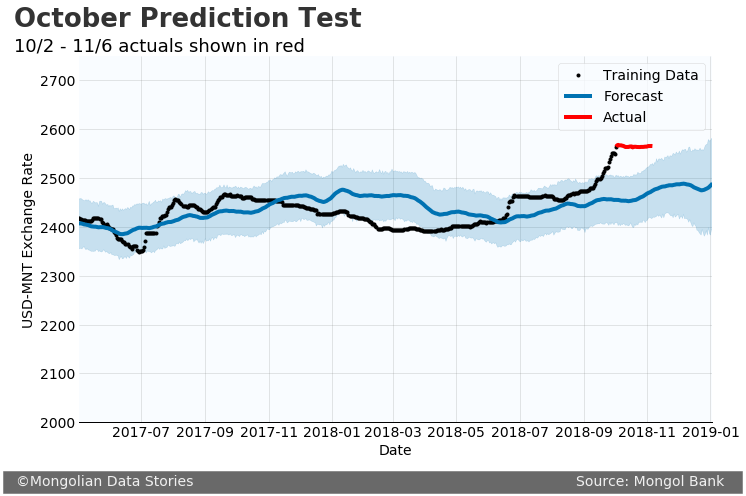

In [157]:
x = mnt_test['Date']
y = mnt_test['USD']
fig25 = m.plot(forecast, xlabel="Date", ylabel="USD-MNT Exchange Rate")
plt.plot(x, y, 'r')
plt.xlim('2017-05-02T00:00:00.000000000', '2019-01-02T00:00:00.000000000')
plt.ylim(2000, 2750)
plt.legend(['Training Data', 'Forecast', 'Actual'])
plt.text(x = '2017-03-01T00:00:00.000000000', y = 2810, s = 'October Prediction Test', fontsize=26, weight='bold', alpha=.8)
plt.text(x = '2017-03-01T00:00:00.000000000', y = 2760, s= '10/2 - 11/6 actuals shown in red ', fontsize=18)
plt.text(x = '2017-02-22T00:00:00.000000000', y = 1870, s = '  ©Mongolian Data Stories                                                                                     Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/Forecast Test October.png', dpi = 300, bbox_inches="tight")

# Compare Euro and Yuan Trends

## Euro

In [17]:
euro = pd.read_csv('Data/Euro-MNT.csv')

In [18]:
euro.head()

,Date,EUR
0,2008-01-02,1717.16
1,2008-01-03,1714.59
2,2008-01-04,1719.21
3,2008-01-07,1720.03
4,2008-01-08,1720.47


In [19]:
euro['Date'] = pd.to_datetime(euro['Date'])

In [20]:
euro = euro.rename(columns={"Date": "ds", "EUR": "y"})

In [21]:
euro.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Plot the time series first, before we go into prophet. 

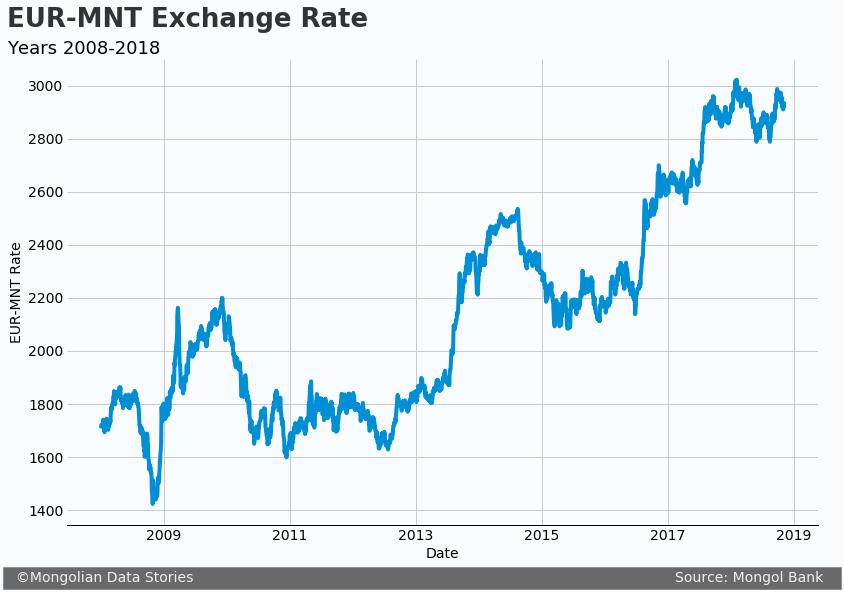

In [22]:
fig, ax = plt.subplots()
ax.plot(euro['ds'], euro['y'])
ax.set_xlabel('Date')
ax.set_ylabel('EUR-MNT Rate')
ax.text(x = 732500, y = 3220, s = 'EUR-MNT Exchange Rate', fontsize=26, weight='bold', alpha=.8)
ax.text(x = 732500, y = 3120, s= 'Years 2008-2018', fontsize=18)
ax.text(x = 732500, y = 1130, s = '  ©Mongolian Data Stories                                                                                                           Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/EUR-MNT Timeseries.png', dpi = 300, bbox_inches="tight")

In [23]:
m2 = Prophet(yearly_seasonality=12, interval_width=0.90)
m2.fit(euro)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Make a future dataframe 365 days to the future. Predictions will be added to this dataframe.

In [24]:
future2 = m2.make_future_dataframe(periods=180)
future2.tail()

,ds
3782,2019-05-01
3783,2019-05-02
3784,2019-05-03
3785,2019-05-04
3786,2019-05-05


Predict into the future to fill the future dataframe. Included are the upper and lower confidence intervals.

In [25]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3782,2019-05-01,3080.972169,2795.801570,3355.940349
3783,2019-05-02,3081.136922,2804.580452,3379.084200
3784,2019-05-03,3081.132108,2794.347651,3356.265852
3785,2019-05-04,3081.369069,2800.902057,3374.639446
3786,2019-05-05,3080.245372,2769.733631,3355.911408


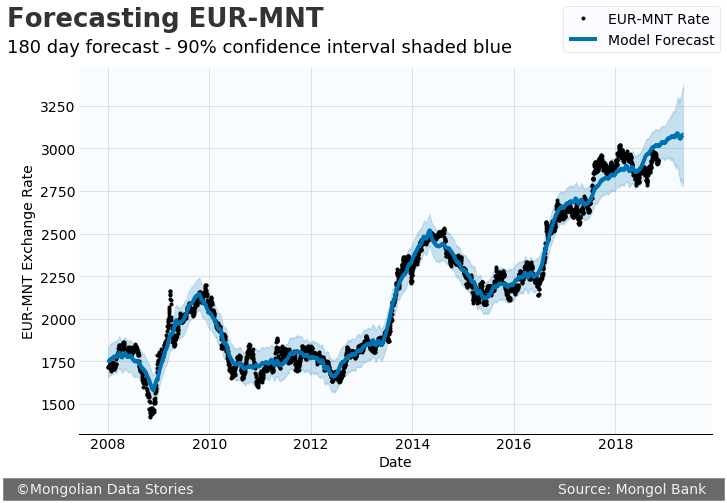

In [26]:
fig4 = m2.plot(forecast2, xlabel="Date", ylabel="EUR-MNT Exchange Rate")
fig4.text(x = 0, y = 1.06, s = 'Forecasting EUR-MNT ', fontsize=26, weight='bold', alpha=.8)
fig4.text(x = 0, y = 1.00, s= '180 day forecast - 90% confidence interval shaded blue', fontsize=18)
fig4.text(x = 0, y = -0.02, s = '  ©Mongolian Data Stories                                                                                 Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
fig4.legend(labels=('EUR-MNT Rate', "Model Forecast"))
plt.savefig('Output/EURO-Forecast.png', dpi = 300, bbox_inches="tight")

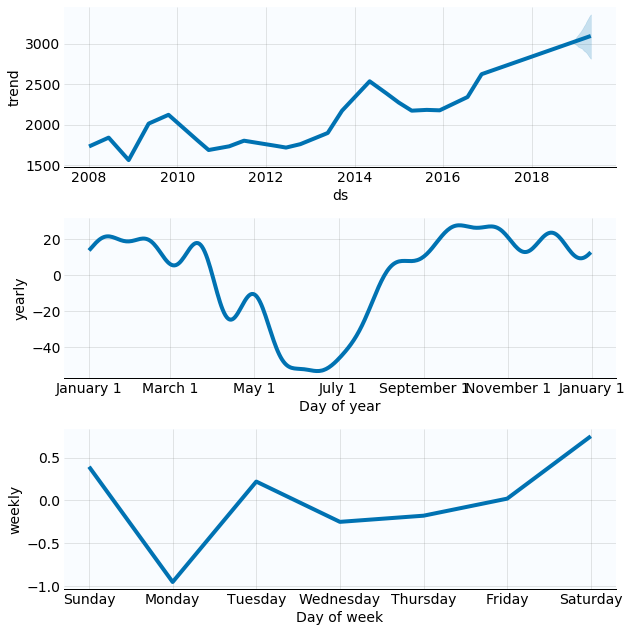

In [27]:
fig5 = m2.plot_components(forecast2)

## Yuan

In [28]:
yuan = pd.read_csv('Data/Yuan-MNT.csv')

In [29]:
yuan.head()

,Date,CNY
0,2008-01-02,160.18
1,2008-01-03,160.39
2,2008-01-04,160.87
3,2008-01-07,160.82
4,2008-01-08,160.86


In [30]:
yuan['Date'] = pd.to_datetime(yuan['Date'])

In [31]:
yuan = yuan.rename(columns={"Date": "ds", "CNY": "y"})

In [32]:
yuan.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Plot the time series first, before we go into prophet. 

In [33]:
ax.get_ylim()

(1343.5225, 3101.4874999999997)

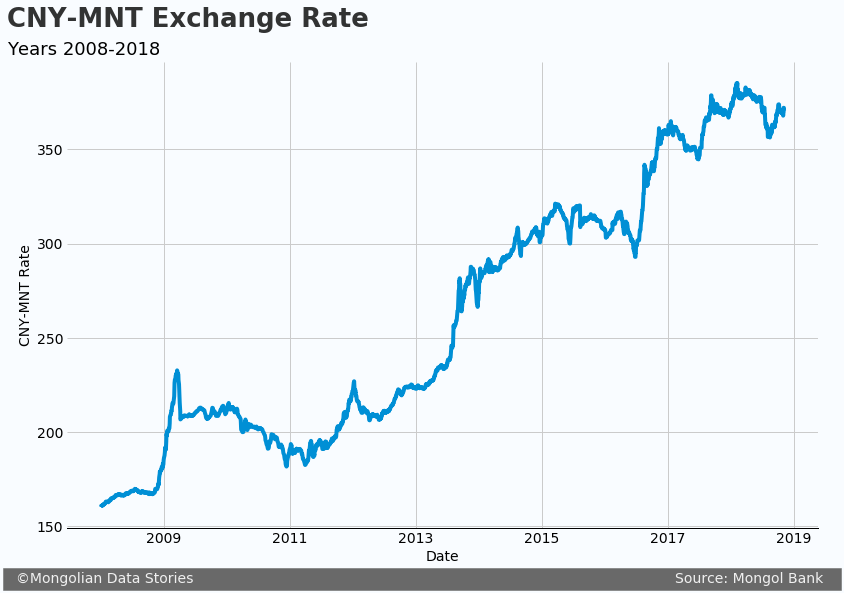

In [34]:
fig, ax = plt.subplots()
ax.plot(yuan['ds'], yuan['y'])
ax.set_xlabel('Date')
ax.set_ylabel('CNY-MNT Rate')
ax.text(x = 732500, y = 415, s = 'CNY-MNT Exchange Rate', fontsize=26, weight='bold', alpha=.8)
ax.text(x = 732500, y = 400, s= 'Years 2008-2018', fontsize=18)
ax.text(x = 732500, y = 120, s = '  ©Mongolian Data Stories                                                                                                           Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/CNY-MNT Timeseries.png', dpi = 300, bbox_inches="tight")

In [35]:
m3 = Prophet(yearly_seasonality=12, interval_width=0.90)
m3.fit(yuan)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Make a future dataframe 365 days to the future. Predictions will be added to this dataframe.

In [36]:
future3 = m3.make_future_dataframe(periods=180)
future3.tail()

,ds
3782,2019-05-01
3783,2019-05-02
3784,2019-05-03
3785,2019-05-04
3786,2019-05-05


Predict into the future to fill the future dataframe. Included are the upper and lower confidence intervals.

In [37]:
forecast3 = m3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3782,2019-05-01,383.041945,357.861109,404.674004
3783,2019-05-02,383.119608,357.686154,406.231591
3784,2019-05-03,383.068292,357.961564,406.297603
3785,2019-05-04,383.047178,359.511751,406.429939
3786,2019-05-05,382.963706,356.503212,406.518838


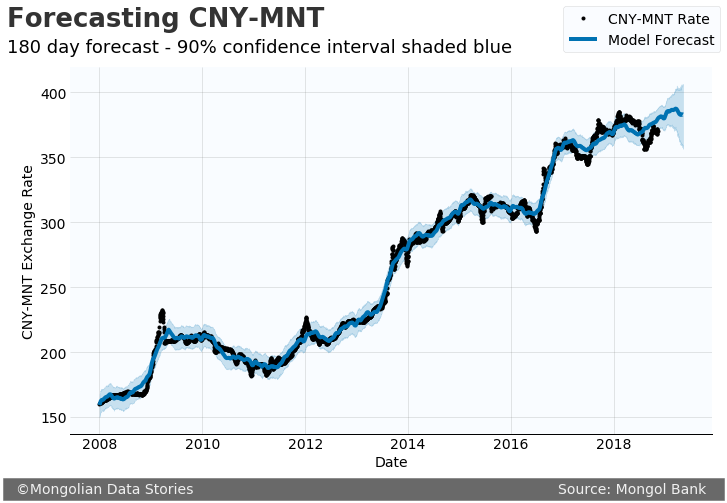

In [38]:
fig6 = m3.plot(forecast3, xlabel="Date", ylabel="CNY-MNT Exchange Rate")
fig6.text(x = 0, y = 1.06, s = 'Forecasting CNY-MNT ', fontsize=26, weight='bold', alpha=.8)
fig6.text(x = 0, y = 1.00, s= '180 day forecast - 90% confidence interval shaded blue', fontsize=18)
fig6.text(x = 0, y = -0.02, s = '  ©Mongolian Data Stories                                                                                 Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
fig6.legend(labels=('CNY-MNT Rate', "Model Forecast"))
plt.savefig('Output/CNY-Forecast.png', dpi = 300, bbox_inches="tight")

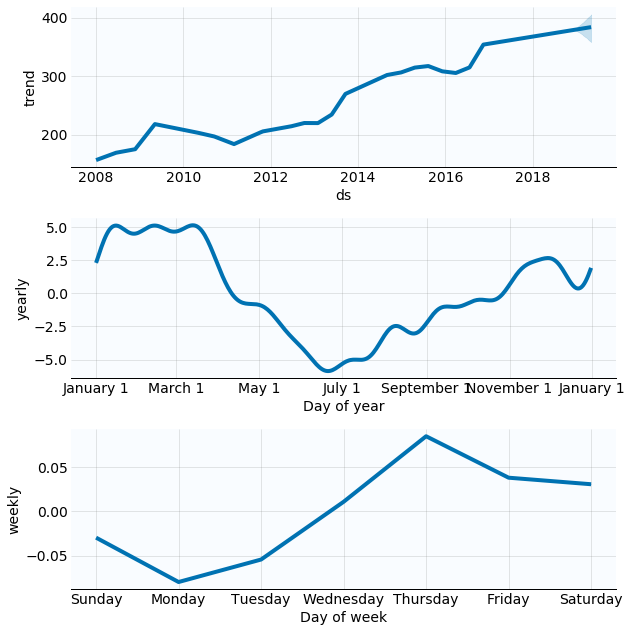

In [39]:
fig7 = m3.plot_components(forecast3)

## Compare yearly trend of USD, Euro, and CNY

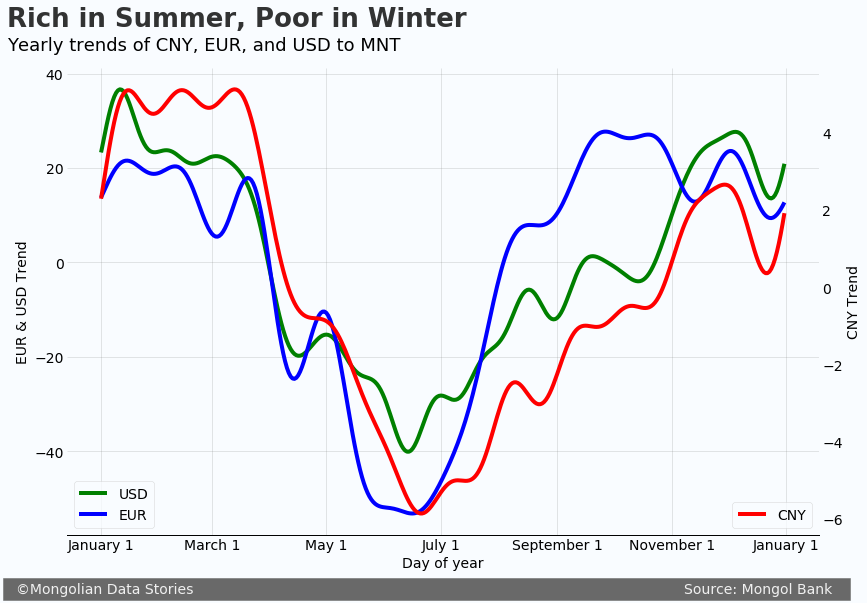

In [40]:
fig, ax = plt.subplots()
plot_yearly(m, ax=ax) # USD
plot_yearly(m2, ax=ax) # Euro
ax2 = ax.twinx() 
plot_yearly(m3, ax=ax2) # CNY
ax.get_lines()[0].set_color("green")
ax.get_lines()[1].set_color("blue")
ax2.get_lines()[0].set_color("red")
ax.set_ylabel('EUR & USD Trend')
ax2.set_ylabel('CNY Trend')
ax.legend(['USD', 'EUR'], loc=3)
ax2.legend(['CNY'],loc=4)
ax2.grid(b=False)
ax.text(x = 736280, y = 50, s = 'Rich in Summer, Poor in Winter', fontsize=26, weight='bold', alpha=.8)
ax.text(x = 736280, y = 45, s= 'Yearly trends of CNY, EUR, and USD to MNT', fontsize=18)
ax.text(x = 736280, y = -70, s = '  ©Mongolian Data Stories                                                                                                             Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/Currency Yearly Trend Comparison.png', dpi = 300, bbox_inches="tight") 

# Main Good Item Price

In [41]:
goods = pd.read_csv('Data/DT_NSO_0600_016V2_-_2018-11-07_- Food Commodity Price.csv', thousands=',')

In [42]:
goods.head()

,Statistical indicator,Aimag,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
0,"Flour, grade",Ulaanbaatar,700,700.0,705,686,690,680,695,700,...,1075,1075,1075,1075,1070,1065.00,1057,1050,1047,1045
1,Beef,Ulaanbaatar,5430,NaN,7365,7630,7750,8180,8070,7850,...,6504,6610,7111,7729,8361,8462.97,8733,9082,8218,7781
2,Mutton,Ulaanbaatar,4985,5905.0,7025,7015,7190,7200,7600,7200,...,5141,5232,5943,6533,7289,7487.96,7514,7533,6977,6412
3,Rice,Ulaanbaatar,1670,1680.0,1670,1660,1670,1700,1695,1735,...,2660,2660,2705,2705,2727,2850.00,2852,2780,2777,2805
4,"Milk, not pastreurised",Ulaanbaatar,1280,1310.0,1350,1285,1130,935,800,850,...,1486,1721,1980,2000,2000,1960.00,1880,1500,1500,1500


In [43]:
goods.drop(columns='Aimag',inplace=True)

In [44]:
goods = goods.melt(id_vars='Statistical indicator', var_name='Date',value_name='price')

In [45]:
beef = goods[(goods['Statistical indicator'] == "Beef")]
mutton = goods[(goods['Statistical indicator'] == "Mutton")]
flour = goods[(goods['Statistical indicator'] == "Flour, grade")]
onion = goods[(goods['Statistical indicator'] == "Onion")]
potato = goods[(goods['Statistical indicator'] == "Potato")]

In [46]:
beef['Date'] = pd.to_datetime(beef['Date'], format='%Y-%m')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
x = beef.Date
y = beef.price
y2 = mutton.price
y3 = onion.price
y4 = flour.price
y5 = potato.price

In [48]:
goods['Statistical indicator'].unique()

array(['Flour, grade', 'Beef', 'Mutton', 'Rice', 'Milk, not pastreurised',
       'Potato', 'Onion'], dtype=object)

In [49]:
#new_handler, = c[0]
#xdata, ydata = new_handler.get_data()
#print(xdata)
ax.get_xlim()

(736311.8, 736712.2)

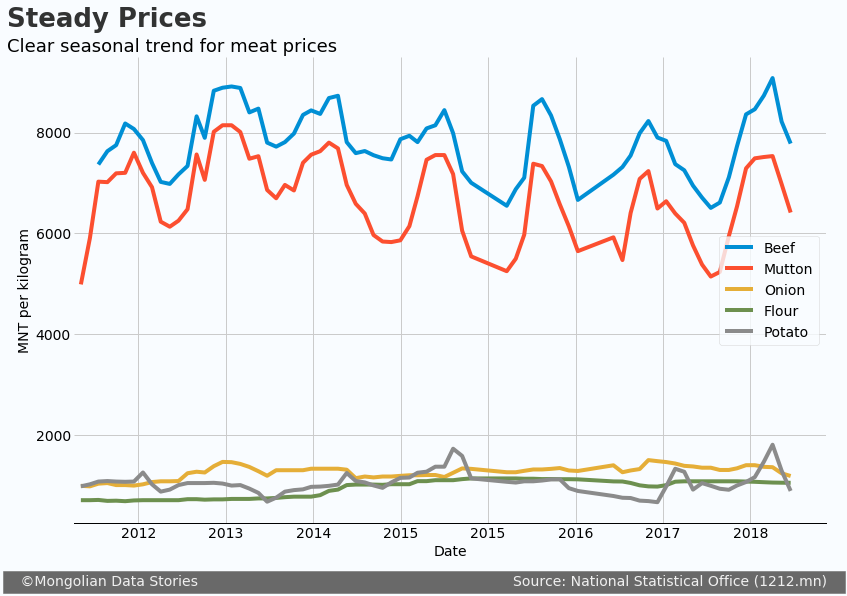

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)
ax.legend(labels=('Beef', 'Mutton', 'Onion', 'Flour', 'Potato'),loc=7)
ax.set_xlabel('Date')
ax.set_ylabel('MNT per kilogram')
ax.set_xlim(left=734481)

import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=300.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.text(x = 734250.25, y = 10100, s = 'Steady Prices', fontsize=26, weight='bold', alpha=.8)
ax.text(x = 734250.25, y = 9600, s= 'Clear seasonal trend for meat prices', fontsize=18)
ax.text(x = 734250.25, y = -1000, s = '   ©Mongolian Data Stories                                                                      Source: National Statistical Office (1212.mn)   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/Domestic Goods Prices.png', dpi = 300, bbox_inches="tight")

# Forecasting Beef and Mutton Prices

## Beef

In [51]:
beef.head()

,Statistical indicator,Date,price
1,Beef,2012-01-01,5430.0
8,Beef,2012-02-01,NaN
15,Beef,2012-03-01,7365.0
22,Beef,2012-04-01,7630.0
29,Beef,2012-05-01,7750.0


In [52]:
beef = beef.rename(columns={"Date": "ds", "price": "y"})

In [53]:
beef.drop(labels='Statistical indicator', axis=1, inplace=True)

In [100]:
beef_m = Prophet(changepoint_prior_scale=.005, seasonality_mode='multiplicative')
beef_m.fit(beef)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [101]:
beef_future = beef_m.make_future_dataframe(periods=720)
beef_future.tail()

,ds
790,2020-08-17
791,2020-08-18
792,2020-08-19
793,2020-08-20
794,2020-08-21


Predict into the future to fill the future dataframe. Included are the upper and lower confidence intervals.

In [102]:
beef_forecast = beef_m.predict(beef_future)
beef_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
790,2020-08-17,7573.454760,6905.752151,8344.163851
791,2020-08-18,7560.682400,6826.832796,8325.607094
792,2020-08-19,7546.240890,6757.710098,8294.238527
793,2020-08-20,7530.305000,6815.717113,8299.104897
794,2020-08-21,7513.088869,6790.883804,8217.921959


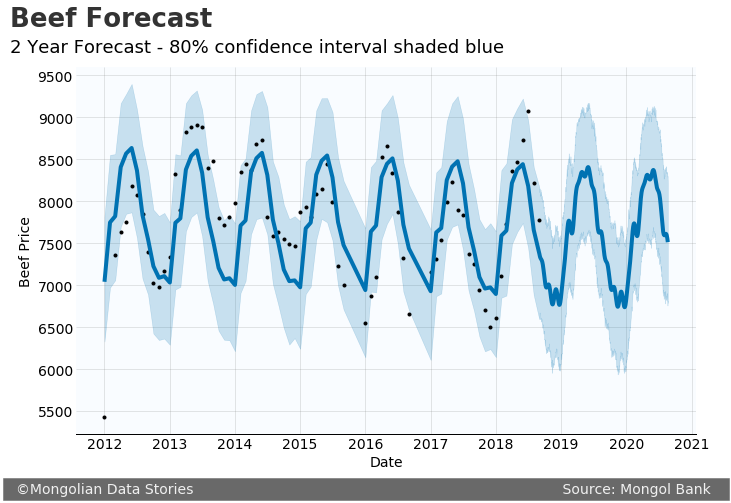

In [124]:
fig10 = beef_m.plot(beef_forecast, xlabel="Date", ylabel="Beef Price")
fig10.text(x = .008, y = 1.06, s = 'Beef Forecast', fontsize=26, weight='bold', alpha=.8)
fig10.text(x = .008, y = 1.00, s= '2 Year Forecast - 80% confidence interval shaded blue', fontsize=18)
fig10.text(x = .004, y = -0.02, s = '  ©Mongolian Data Stories                                                                                  Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/Beef Forecast.png', dpi = 300, bbox_inches="tight")

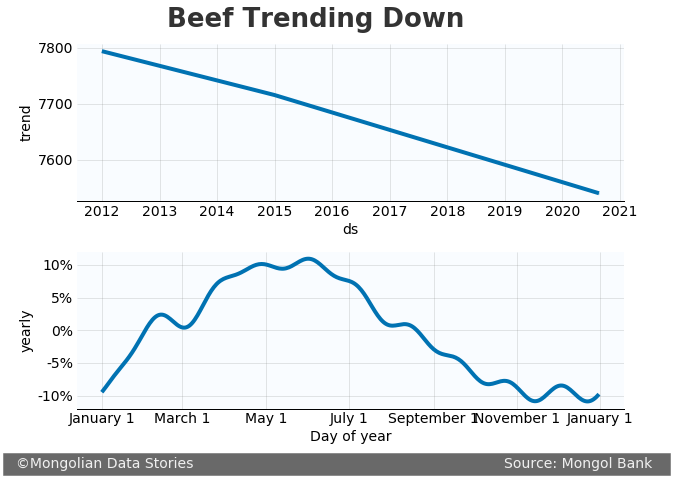

In [125]:
fig11 = beef_m.plot_components(beef_forecast)
fig11.text(x = .25, y = 1, s = 'Beef Trending Down', fontsize=26, weight='bold', alpha=.8)
fig11.text(x = .004, y = -0.02, s = '  ©Mongolian Data Stories                                                                     Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/Beef Trend.png', dpi = 300, bbox_inches="tight")

## Mutton

In [87]:
mutton = mutton.rename(columns={"Date": "ds", "price": "y"})
mutton.drop(labels='Statistical indicator', axis=1, inplace=True)

ValueError: labels ['Statistical indicator'] not contained in axis

In [92]:
mutton_m = Prophet(changepoint_prior_scale=.005, seasonality_mode='multiplicative')
mutton_m.fit(mutton)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [93]:
mutton_future = mutton_m.make_future_dataframe(periods=720)
mutton_future.tail()

,ds
790,2020-08-17
791,2020-08-18
792,2020-08-19
793,2020-08-20
794,2020-08-21


Predict into the future to fill the future dataframe. Included are the upper and lower confidence intervals.

In [94]:
mutton_forecast = mutton_m.predict(mutton_future)
mutton_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
790,2020-08-17,6196.113573,5620.934516,6800.435986
791,2020-08-18,6180.694912,5579.066513,6766.888570
792,2020-08-19,6163.216882,5607.704060,6766.657113
793,2020-08-20,6143.931747,5563.835817,6726.842203
794,2020-08-21,6123.149138,5535.450574,6713.248566


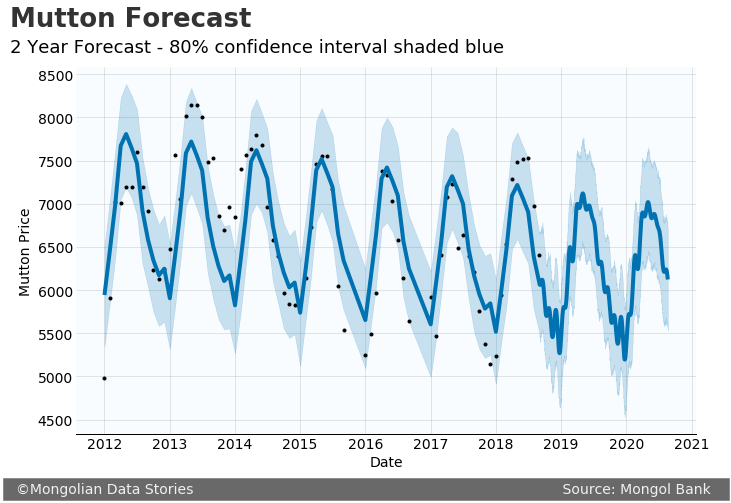

In [126]:
fig12 = mutton_m.plot(mutton_forecast, xlabel="Date", ylabel="Mutton Price")
fig12.text(x = .008, y = 1.06, s = 'Mutton Forecast', fontsize=26, weight='bold', alpha=.8)
fig12.text(x = .008, y = 1.00, s= '2 Year Forecast - 80% confidence interval shaded blue', fontsize=18)
fig12.text(x = .004, y = -0.02, s = '  ©Mongolian Data Stories                                                                                  Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/Mutton Forecast.png', dpi = 300, bbox_inches="tight")

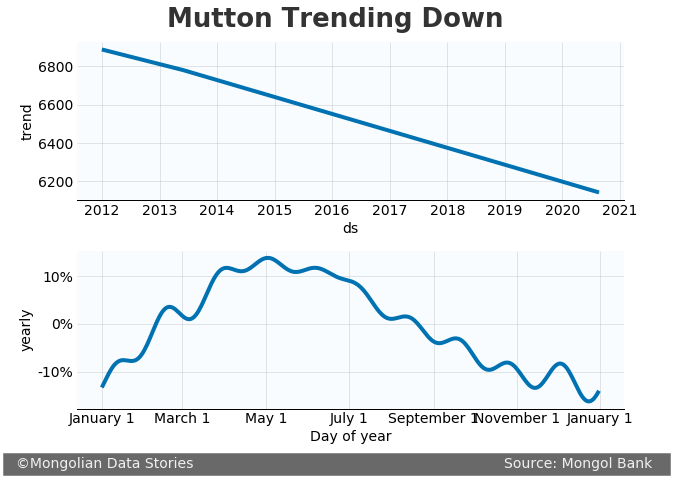

In [127]:
fig13 = mutton_m.plot_components(mutton_forecast)
fig13.text(x = .25, y = 1, s = 'Mutton Trending Down', fontsize=26, weight='bold', alpha=.8)
fig13.text(x = .004, y = -0.02, s = '  ©Mongolian Data Stories                                                                     Source: Mongol Bank   ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('Output/Mutton Trend.png', dpi = 300, bbox_inches="tight")